# Chapter 5: Statistics

In [1]:
import random
import math
import collections
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_friends = [100, 49, 41, 40, 25, 49, 22, 83, 130, 44, 84, 23, 49, 30, 41, 25, 49, 38, 37]

In [3]:
for i in range(100):
    num_friends.append(random.randint(1,25))

In [4]:
print(num_friends)

[100, 49, 41, 40, 25, 49, 22, 83, 130, 44, 84, 23, 49, 30, 41, 25, 49, 38, 37, 4, 22, 6, 24, 6, 3, 10, 15, 10, 5, 14, 25, 12, 13, 5, 6, 5, 7, 17, 14, 22, 25, 10, 24, 5, 2, 7, 20, 13, 17, 7, 10, 16, 6, 21, 14, 3, 20, 11, 25, 22, 25, 20, 2, 2, 4, 10, 15, 6, 8, 15, 10, 24, 18, 6, 10, 1, 9, 19, 22, 6, 20, 15, 25, 18, 2, 7, 21, 15, 15, 6, 25, 24, 15, 3, 1, 10, 10, 25, 12, 14, 1, 24, 7, 15, 9, 15, 19, 5, 17, 23, 23, 19, 3, 16, 4, 18, 8, 13, 9]


In [5]:
friend_counts = collections.Counter(num_friends)

In [6]:
xs = range(101)
ys = [friend_counts[x] for x in xs]

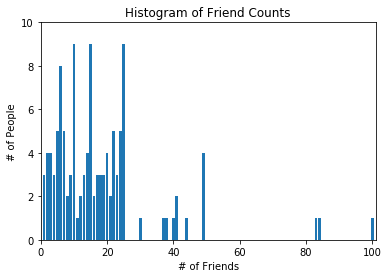

In [7]:
plt.bar(xs, ys)
plt.axis([0, 101, 0, 10])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of Friends")
plt.ylabel("# of People")
plt.show()

In [8]:
num_points = len(num_friends)
print(num_points)

119


In [9]:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)

130
1


In [10]:
sorted_values =  sorted(num_friends)

In [11]:
if smallest_value == sorted_values[0]:
    print('Test correct')

Test correct


In [12]:
if largest_value == sorted_values[-1]:
    print('Test correct')

Test correct


In [13]:
def mean_func(x):
    return sum(x) / len(x)

In [14]:
print(mean_func(num_friends))

18.865546218487395


In [15]:
import statistics
print(statistics.mean(num_friends))

18.865546218487395


In [16]:
def median_func(x):
    n = len(x)
    sorted_x = sorted(x)
    midpoint = n // 2
    
    if midpoint % 2 == 1:
        return sorted_x[midpoint]
    else:
        hi = sorted_x[midpoint]
        lo = sorted_x[midpoint-1]
        return (hi+lo)/2

In [17]:
if median_func(num_friends) == statistics.median(num_friends):
    print('Median function worked correctly')
    print(median_func(num_friends))

Median function worked correctly
15


In [18]:
def percentile_func(x, value):
    # Returns the percentile for a given value in dataset x
    n = len(x)
    return len([i for i in x if i < value]) / n
    

In [19]:
percentile_func(num_friends, 10)

0.31092436974789917

In [20]:
def quantile_func(x, p):
    #Returns the value of dataset x that is in the pth percentile
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [21]:
quantiles_test = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
for i in quantiles_test:
    print('The ' + str(i) + ' percentile value is: ' + str(quantile_func(num_friends, i)))

The 0.1 percentile value is: 4
The 0.25 percentile value is: 7
The 0.5 percentile value is: 15
The 0.75 percentile value is: 23
The 0.9 percentile value is: 40
The 0.99 percentile value is: 100


In [22]:
def mode_func(x):
    counts = collections.Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

In [23]:
mode_func(num_friends)

[10, 15, 25]

In [24]:
try:
    statistics.mode(num_friends)
except ValueError as e: 
    print(e)

no unique mode; found 3 equally common values


In [25]:
def range_func(x):
    return max(x) - min(x)

In [26]:
range_func(num_friends)

129

In [27]:
def de_mean(x):
    x_bar = mean_func(x)
    return [x_i - x_bar for x_i in x]

In [28]:
def variance_func(x):
    n = len(x)
    return sum([x_i ** 2 for x_i in de_mean(x)])/ (n-1)

In [29]:
variance_func(num_friends)

363.4902435550495

In [30]:
statistics.variance(num_friends)


363.4902435550491

In [31]:
def standard_deviation(x):
    return math.sqrt(variance_func(x))

In [32]:
if round(standard_deviation(num_friends), 6) == round(statistics.stdev(num_friends), 6):
    print("Standard deviation function working!")

Standard deviation function working!


In [33]:
def interquartile_range(x):
    return quantile_func(x, 0.75) - quantile_func(x, 0.25)

In [34]:
interquartile_range(num_friends)

16

In [35]:
from scipy.stats import iqr
iqr(num_friends)

16.0

### Time to look at correlation between number of friends and time spent on site.

In [36]:
def dot(x, y):
    return sum(x_i * y_i for x_i, y_i in zip(x, y))

In [37]:
def covariance_func(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

In [38]:
daily_minutes = [abs(random.gauss((x_i+100)/20, 1)) for x_i in num_friends]
daily_minutes[20:25] = [20, 20, 20, 0, 0] #inserting outliers

In [39]:
covariance_func(num_friends, daily_minutes)

17.208273165557404

In [40]:
np.cov(num_friends, daily_minutes)

array([[363.49024356,  17.20827317],
       [ 17.20827317,   7.1660102 ]])

In [41]:
def correlation_func(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance_func(x, y) / (stdev_x * stdev_y)
    else:
        return 0

In [42]:
correlation_func(num_friends, daily_minutes)

0.33717254292751153

In [43]:
np.corrcoef(num_friends, daily_minutes)

array([[1.        , 0.33717254],
       [0.33717254, 1.        ]])

<function matplotlib.pyplot.show(*args, **kw)>

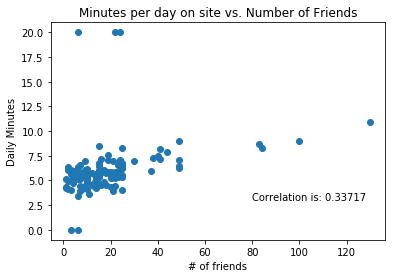

In [44]:
plt.scatter(num_friends, daily_minutes)
plt.title("Minutes per day on site vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("Daily Minutes")
corr_text = 'Correlation is: ' + str(round(correlation_func(num_friends, daily_minutes),5))
plt.text(80, 3, corr_text)
plt.show

In [45]:
outliers = [0, 20]

In [46]:
num_friends_good = [x_i for x_i, y_i  in zip(num_friends,daily_minutes) if y_i not in outliers]
daily_minutes_good = [y_i for y_i  in daily_minutes if y_i not in outliers]

In [47]:
correlation_func(num_friends_good, daily_minutes_good)


0.694661002736515

<function matplotlib.pyplot.show(*args, **kw)>

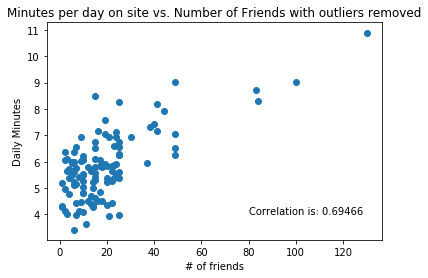

In [48]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Minutes per day on site vs. Number of Friends with outliers removed")
plt.xlabel("# of friends")
plt.ylabel("Daily Minutes")
corr_text = 'Correlation is: ' + str(round(correlation_func(num_friends_good, daily_minutes_good),5))
plt.text(80, 4, corr_text)
plt.show